![](logo1.jpg)

# SHAI Training 2022 | Level 1
## Diamond Price Prediction

***
# 1- Get the Data
***

In [1059]:
import numpy as np
import pandas as pd

## **Get the data**

**Read sample_submission.csv as a dataframe.**

In [1060]:
dataset = pd.read_csv('/content/train.csv')

**Use data to create dataframe called Diamond_data.**

In [1061]:
Diamond_data = pd.DataFrame(dataset)

***
# 2- Discover and visualize the data
***

# **Data discovery**

**Check the head of Diamond_data, and check out its info() and describe() methods.**

#### 1-Discovering the top five rows using the DataFrame’s head() method




In [1062]:
top_ten_rows = Diamond_data.head(5)
top_ten_rows

Unnamed: 0  carat        cut color clarity  depth  table  price     x  \
0           2   0.21    Premium     E     SI1   59.8   61.0    326  3.89   
1           4   0.29    Premium     I     VS2   62.4   58.0    334  4.20   
2           5   0.31       Good     J     SI2   63.3   58.0    335  4.34   
3           6   0.24  Very Good     J    VVS2   62.8   57.0    336  3.94   
4           7   0.24  Very Good     I    VVS1   62.3   57.0    336  3.95   

      y     z  
0  3.84  2.31  
1  4.23  2.63  
2  4.35  2.75  
3  3.96  2.48  
4  3.98  2.47

#### 2-Use the info() method to get description of the data

In [1063]:
Diamond_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43040 entries, 0 to 43039
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  43040 non-null  int64  
 1   carat       43040 non-null  float64
 2   cut         43040 non-null  object 
 3   color       43040 non-null  object 
 4   clarity     43040 non-null  object 
 5   depth       43040 non-null  float64
 6   table       43040 non-null  float64
 7   price       43040 non-null  int64  
 8   x           43040 non-null  float64
 9   y           43040 non-null  float64
 10  z           43040 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.6+ MB


In [1064]:
Diamond_data = Diamond_data.drop('Unnamed: 0', axis=1)

In [1065]:
Diamond_data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [1066]:
Diamond_data["color"].value_counts()

G    9080
E    7723
F    7527
H    6640
D    5555
I    4297
J    2218
Name: color, dtype: int64

In [1067]:
Diamond_data["cut"].value_counts()

Ideal        17424
Premium      11031
Very Good     9407
Good          3910
Fair          1268
Name: cut, dtype: int64

In [1068]:
Diamond_data["clarity"].value_counts()

SI1     10363
VS2      9981
SI2      7380
VS1      6479
VVS2     3959
VVS1     2838
IF       1483
I1        557
Name: clarity, dtype: int64

#### 4-Let’s look at the summary of the numerical attributes . Using the describe() method

In [1069]:
Diamond_data.describe()

carat         depth         table         price             x  \
count  43040.000000  43040.000000  43040.000000  43040.000000  43040.000000   
mean       0.796964     61.746080     57.439542   3942.706343      5.724376   
std        0.481455      1.435246      2.240196   4023.534556      1.132496   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.380000     61.000000     56.000000    940.000000      4.660000   
50%        0.710000     61.800000     57.000000   2388.000000      5.710000   
75%        1.030000     62.500000     59.000000   5309.250000      6.500000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  43040.000000  43040.000000  
mean       5.728122      3.534367  
std        1.159641      0.714543  
min        0.000000      0.000000  
25%        4.670000      2.870000  
50%        5.720000      3.530000  
75%        6.500000      4.020000  
max       58.900000     31.800000

# **Data visualization**

In [1070]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
from sklearn import preprocessing

#### Create a hist plot for Diamond_data dataframe

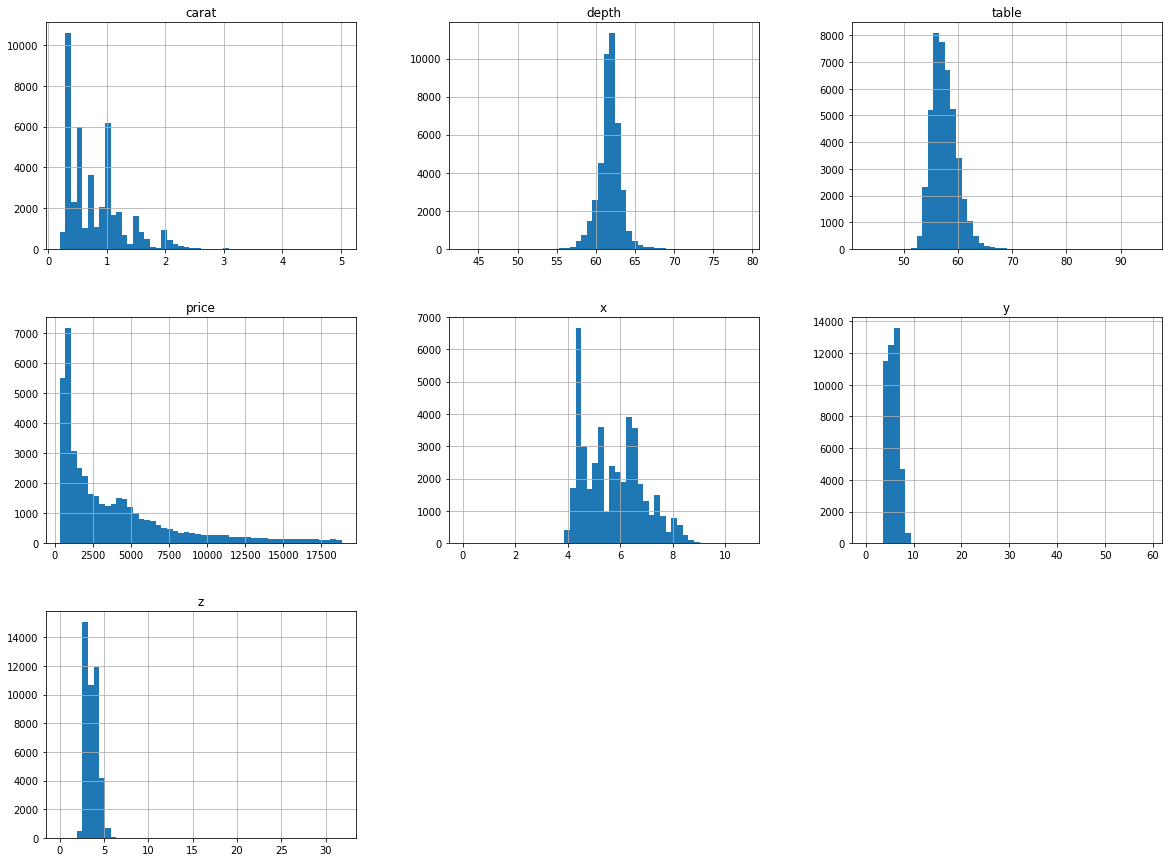

In [1071]:
Diamond_data.hist(bins=50, figsize=(20,15))
plt.show()

#### Explore correlation between all continuous numeric variables using .corr() method.

In [1072]:
Diamond_data_corr= Diamond_data.corr()
Diamond_data_corr

carat     depth     table     price         x         y         z
carat  1.000000  0.022599  0.191260  0.923801  0.974368  0.946001  0.948625
depth  0.022599  1.000000 -0.292084 -0.014393 -0.031088 -0.034945  0.088335
table  0.191260 -0.292084  1.000000  0.136975  0.204768  0.191469  0.159775
price  0.923801 -0.014393  0.136975  1.000000  0.887483  0.863748  0.860625
x      0.974368 -0.031088  0.204768  0.887483  1.000000  0.969541  0.966909
y      0.946001 -0.034945  0.191469  0.863748  0.969541  1.000000  0.944215
z      0.948625  0.088335  0.159775  0.860625  0.966909  0.944215  1.000000

#### Use seaborn method to convert the correlation matrix to a heatmap plot


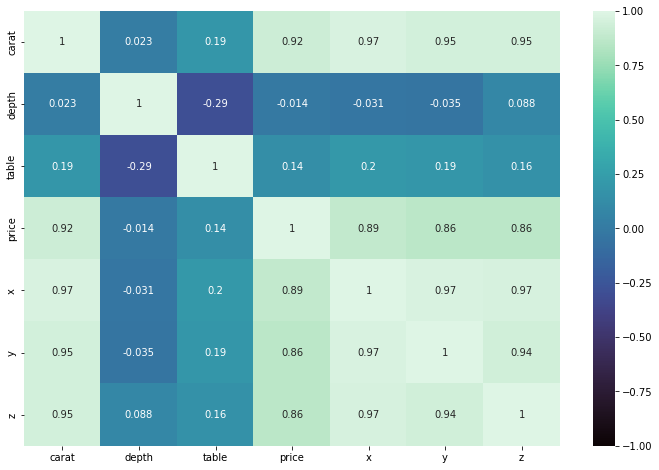

In [1073]:
plt.figure(figsize=(12, 8))
sns.heatmap(Diamond_data_corr, vmin=-1, vmax=1, annot=True, cmap= 'mako')

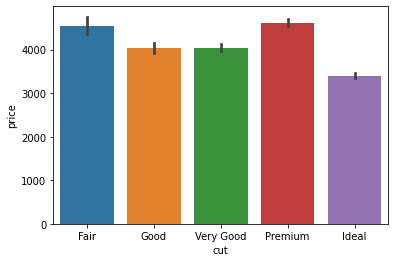

In [1074]:
sns.barplot(x='cut', y='price', order=['Fair','Good','Very Good','Premium','Ideal'], data=Diamond_data)

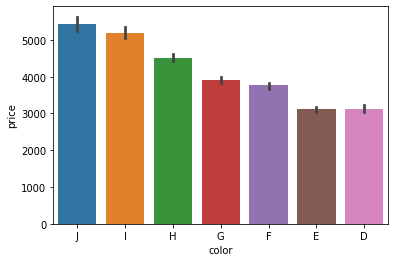

In [1075]:
sns.barplot(x='color', y='price', order=['J','I','H','G','F','E','D'], data=Diamond_data)

In [1076]:
print("Average Price of Color J: ", Diamond_data['price'].loc[np.where(Diamond_data['color'] == 'J')].mean())
print("Average Price of Color D: ", Diamond_data['price'].loc[np.where(Diamond_data['color'] == 'D')].mean())

Average Price of Color J:  5433.154192966636
Average Price of Color D:  3128.875067506751


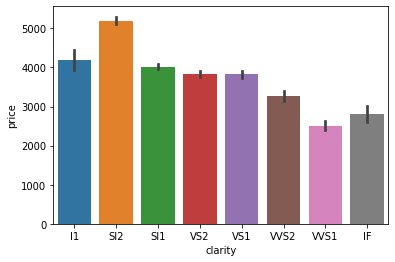

In [1077]:
sns.barplot(x='clarity', y='price', order=['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF'], data=Diamond_data)

In [1078]:
print("Average Price of Clarity SI2: ", Diamond_data['price'].loc[np.where(Diamond_data['clarity'] == 'SI2')].mean())
print("Average Price of Color IF: ", Diamond_data['price'].loc[np.where(Diamond_data['clarity'] == 'IF')].mean())
print("Average Price of Color VVS1: ", Diamond_data['price'].loc[np.where(Diamond_data['clarity'] == 'VVS1')].mean())

Average Price of Clarity SI2:  5196.133739837398
Average Price of Color IF:  2809.335805799056
Average Price of Color VVS1:  2503.7706131078226


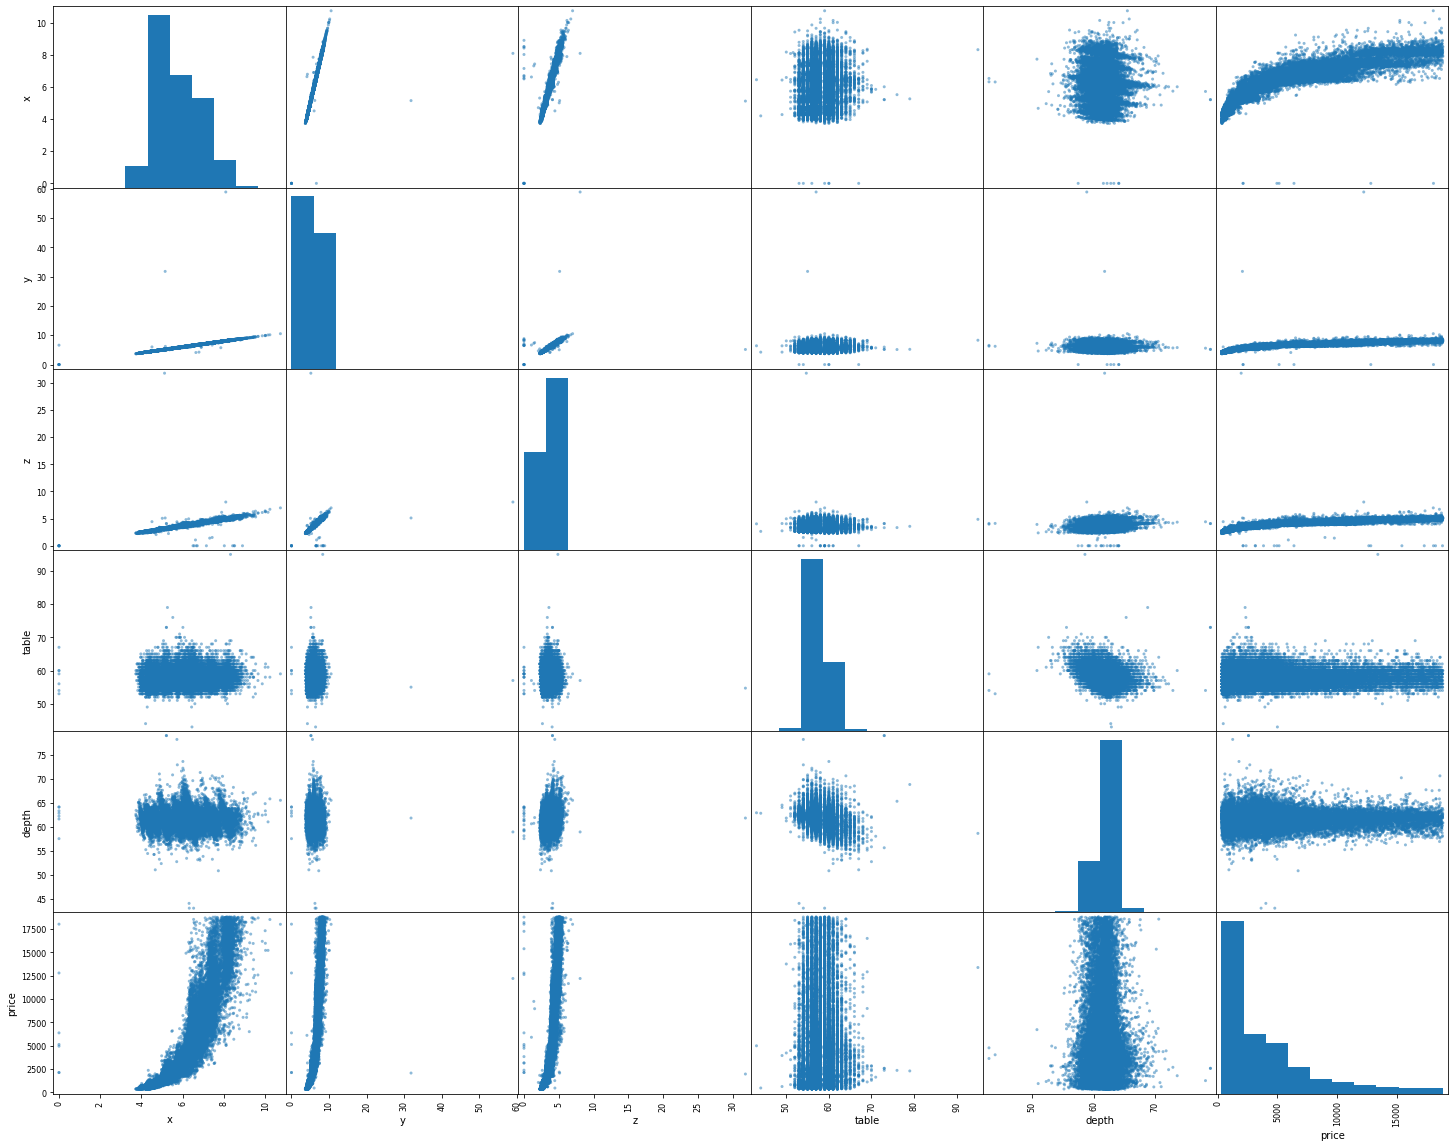

In [1079]:
from pandas.plotting import scatter_matrix

attributes = ["x", "y", "z", "table", "depth", "price"]
scatter_matrix(Diamond_data[attributes], figsize=(25,20))
plt.show()

# Prepare the data

In [1080]:
Diamond = Diamond_data.drop("price", axis=1)
Diamond_labels = Diamond_data["price"].copy()

diamonds_num = Diamond.drop(["cut", "color", "clarity"], axis=1)

diamonds_cat = Diamond[["cut", "color", "clarity"]]
diamonds_cat.head()

cut color clarity
0    Premium     E     SI1
1    Premium     I     VS2
2       Good     J     SI2
3  Very Good     J    VVS2
4  Very Good     I    VVS1

In [1081]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

num_attributes = list(diamonds_num)
cat_attributes = ["cut", "color", "clarity"]

pipeline = ColumnTransformer([
    ("num", StandardScaler(), num_attributes),
    ("cat", OneHotEncoder(), cat_attributes)
])

In [1082]:
diamond_prepared = pipeline.fit_transform(Diamond)

pd.DataFrame(diamond_prepared).head()

0         1         2         3         4         5    6    7    8   \
0 -1.219160 -1.355937  1.589369 -1.619783 -1.628215 -1.713517  0.0  0.0  0.0   
1 -1.052995  0.455620  0.250185 -1.346048 -1.291900 -1.265673  0.0  0.0  0.0   
2 -1.011454  1.082698  0.250185 -1.222426 -1.188418 -1.097731  0.0  1.0  0.0   
3 -1.156848  0.734321 -0.196209 -1.575632 -1.524733 -1.475600  0.0  0.0  0.0   
4 -1.156848  0.385945 -0.196209 -1.566802 -1.507486 -1.489595  0.0  0.0  0.0   

    9   ...   16   17   18   19   20   21   22   23   24   25  
0  1.0  ...  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  
1  1.0  ...  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  
2  0.0  ...  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  
3  0.0  ...  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  
4  0.0  ...  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  

[5 rows x 26 columns]

# **Select and Train Model**

# Train a Linear Regression model

In [1083]:
from sklearn.linear_model import LinearRegression

l_reg = LinearRegression()
l_reg.fit(diamond_prepared, Diamond_labels)

LinearRegression()

In [1084]:
from sklearn.metrics import mean_squared_error
y_pred1 = l_reg.predict(diamond_prepared)

l_reg_mse = mean_squared_error(Diamond_labels, y_pred1)
l_reg_rmse = np.sqrt(l_reg_mse)
l_reg_rmse

1132.3793080113244

# Evaluation using Cross-Validation

In [1085]:
scores = cross_val_score(l_reg, diamond_prepared, Diamond_labels,
                         scoring="neg_mean_squared_error", cv=10)
l_reg_rmse_score = np.sqrt(-scores)
l_reg_rmse_score

array([ 910.30486164,  821.68475128,  927.16578425, 1279.79350481,
       2507.59904519, 1783.61488778,  707.23712138,  773.1640223 ,
        711.31620283,  781.36405582])

# Train a Decision Tree Regression model

In [1086]:
from sklearn.tree import DecisionTreeRegressor 

d_tree = DecisionTreeRegressor()
d_tree.fit(diamond_prepared, Diamond_labels)

y_pred2 = d_tree.predict(diamond_prepared)

d_tree_mse = mean_squared_error(Diamond_labels, y_pred2)
d_tree_rmse = np.sqrt(d_tree_mse)
d_tree_rmse

9.550703771663994

# Evaluation using Cross-Validation

In [1087]:
scores = cross_val_score(d_tree, diamond_prepared, Diamond_labels,
                         scoring="neg_mean_squared_error", cv=10)
d_tree_rmse_score = np.sqrt(-scores)
d_tree_rmse_score

array([ 676.62334987,  802.62632722, 1030.77821438, 1760.27634665,
       3174.69819765, 1367.23043929,  173.33228133,  259.03333983,
        332.197432  ,  547.49512764])

# K-Nearest Neighbors

In [1088]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(5)
knn.fit(diamond_prepared, Diamond_labels)

y_pred2 = knn.predict(diamond_prepared)

knn_mse = mean_squared_error(Diamond_labels, y_pred2)
knn_rmse = np.sqrt(knn_mse)
knn_rmse

636.2169643792442

# Evaluation using Cross-Validation

In [1089]:
scores = cross_val_score(knn, diamond_prepared, Diamond_labels,
                         scoring="neg_mean_squared_error", cv=10)
knn_rmse_score = np.sqrt(-scores)
knn_rmse_score

array([ 820.82053072,  792.64970664, 1076.01497062, 1739.36402719,
       3080.90984445, 1688.33164975,  192.60686528,  331.62112894,
        390.41896029,  719.28698661])

# Train a Random Forest Regression model

In [1090]:
from sklearn.ensemble import RandomForestRegressor

f_reg = RandomForestRegressor(n_estimators=100, random_state=42)
f_reg.fit(diamond_prepared, Diamond_labels)

y_pred2 = f_reg.predict(diamond_prepared)

f_reg_mse = mean_squared_error(Diamond_labels, y_pred2)
f_reg_rmse = np.sqrt(f_reg_mse)
f_reg_rmse

208.55987691514437

# Evaluation using Cross-Validation

In [1091]:
scores = cross_val_score(f_reg, diamond_prepared, Diamond_labels,
                         scoring="neg_mean_squared_error", cv=10)
f_reg_rmse_score = np.sqrt(-scores)
f_reg_rmse_score

array([ 518.14958593,  570.43207856,  801.83300456, 1263.88969681,
       2350.14739189, 1272.81630045,  142.1716906 ,  202.21713281,
        255.31516569,  400.53027765])

# Train XGBoost

In [1092]:
from xgboost import XGBRegressor

xgb = XGBRegressor()
xgb.fit(diamond_prepared, Diamond_labels)

y_pred2 = xgb.predict(diamond_prepared)

xgb_mse = mean_squared_error(Diamond_labels, y_pred2)
xgb_rmse = np.sqrt(xgb_mse)
xgb_rmse

[10:16:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


719.8210314027024

# Evaluation using Cross-Validation

In [1093]:
scores = cross_val_score(xgb, diamond_prepared, Diamond_labels,
                         scoring="neg_mean_squared_error", cv=10)
xgb_rmse_score = np.sqrt(-scores)
xgb_rmse_score

[10:16:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:16:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:16:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:16:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:16:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:16:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:16:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:17:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

array([ 536.75804846,  656.78943752,  884.60916064, 1468.14472698,
       2455.54290943, 1543.71017023,  175.41336591,  225.30842505,
        256.88235209,  410.81394225])

# **Test Model**

In [1094]:
test_data = pd.read_csv('/content/test.csv')
testData_prepared = pipeline.transform(test_data)

In [1104]:
y_pred_test = xgb.predict(testData_prepared)
y_pred_test

array([ 375.31546,  867.9036 ,  276.29767, ..., 2946.758  , 2896.9714 ,
       2679.3105 ], dtype=float32)

# **Project Submission**

In [1105]:
sample = pd.read_csv("/content/sample_submission.csv")
sample['price'] = y_pred_test
sample.to_csv("submission.csv", index=False)
sample

Unnamed: 0        price
0               1   375.315460
1               3   867.903625
2               8   276.297668
3              10   592.778259
4              12   420.347198
...           ...          ...
10895       53922  2775.963867
10896       53923  2915.951660
10897       53933  2946.758057
10898       53934  2896.971436
10899       53938  2679.310547

[10900 rows x 2 columns]